# TP Régression Linéaire

Ce projet a pour but de présenter la pipeline basique du machine learning en utilisant la régression linéaire comme exemple.
L'objectif va être de prédire le prix de voitures usées.

In [1]:
# Install dependencies, download and unzip the data.
# See https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset

!pip install kaggle pandas numpy matplotlib
!kaggle datasets download -d taeefnajib/used-car-price-prediction-dataset
!unzip used-car-price-prediction-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
100% 109k/109k [00:00<00:00, 375kB/s]
100% 109k/109k [00:00<00:00, 375kB/s]
Archive:  used-car-price-prediction-dataset.zip
  inflating: used_cars.csv           


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("used_cars.csv")
df = df.drop(columns=["brand", "model", "fuel_type", "engine", "transmission", "ext_col", "int_col", "clean_title"])

print(f"Number of cars: {len(df)}")
df.head()

Number of cars: 4009


,model_year,milage,accident,price
0,2013,"51,000 mi.",At least 1 accident or damage reported,"$10,300"
1,2021,"34,742 mi.",At least 1 accident or damage reported,"$38,005"
2,2022,"22,372 mi.",None reported,"$54,598"
3,2015,"88,900 mi.",None reported,"$15,500"
4,2021,"9,835 mi.",None reported,"$34,999"


## Préparation des données

On commence par convertir les données en valeur numérique :

- Reformatez les colonnes `milage` et `price` pour ne garder que les chiffres.
- Changez le type des colonnes `milage` et `price` en flottant.
- Dans la colonne `accident`, remplacez les valeurs `"None reported"` par 0 et les autres valeurs par 1.

In [3]:
# Convert milage to floats.

df["milage"] = df["milage"].apply(lambda x: x.replace(",", ""))
df["milage"] = df["milage"].apply(lambda x: x.replace(" mi.", ""))
df["milage"] = df["milage"].astype(float)

# Convert price to floats.
df["price"] = df["price"].apply(lambda x: x.replace(",", ""))
df["price"] = df["price"].apply(lambda x: x.replace("$", ""))
df["price"] = df["price"].astype(float)

# Convert accidents to binary values.
df["accident"] = df["accident"] != "None reported"
df["accident"] = df["accident"].astype(int)

In [4]:
print(df.dtypes)
df.head()

model_year      int64
milage        float64
accident        int64
price         float64
dtype: object


,model_year,milage,accident,price
0,2013,51000.0,1,10300.0
1,2021,34742.0,1,38005.0
2,2022,22372.0,0,54598.0
3,2015,88900.0,0,15500.0
4,2021,9835.0,0,34999.0


## Exploration et analyse des données (EDA)

Maintenant que les données sont sous forme numérique, on peut commencer à explorer un peu à quoi elles ressemblent.

Cette étape est couramment appelée *Exploratory Data Analysis* (EDA).
Elle permet de mieux comprendre nos données et de savoir quelles transformations on va vouloir appliquer avant d'entraîner notre modèle.

- Affichez les distributions de chaque features et du prix.
- Qu'en concluez-vous ?
- Quelles sont les transformations que l'on pourrait appliquer ?

---

- Affichez ensuite un *scatter plot* de chaque feature en fonction du prix de la voiture.
- Quelles sont les features les plus prometteuses ?

*N'hésitez pas à appliquer des transformations sur les données avant de faire les scatter plot afin d'y voir plus clair.*

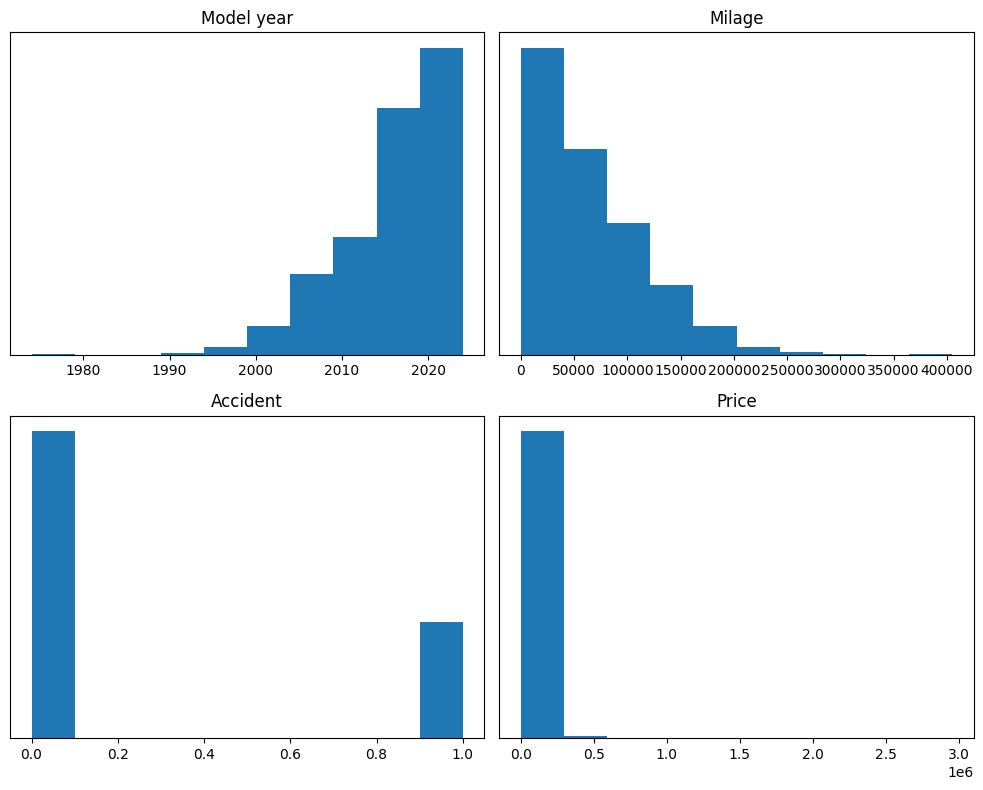

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist(df["model_year"])
axs[0, 0].set_title("Model year")
axs[0, 0].yaxis.set_visible(False)

axs[0, 1].hist(df["milage"])
axs[0, 1].set_title("Milage")
axs[0, 1].yaxis.set_visible(False)

axs[1, 0].hist(df["accident"])
axs[1, 0].set_title("Accident")
axs[1, 0].yaxis.set_visible(False)

axs[1, 1].hist(df["price"])
axs[1, 1].set_title("Price")
axs[1, 1].yaxis.set_visible(False)

fig.tight_layout()
fig.show()

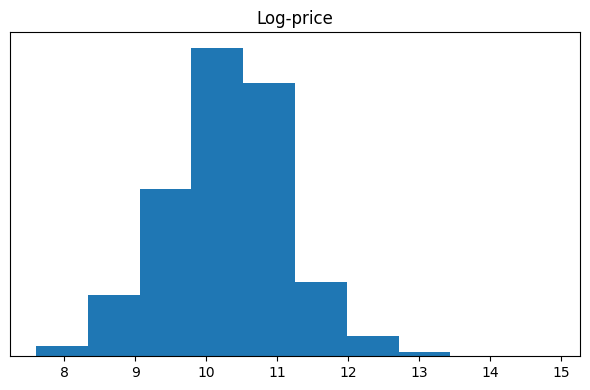

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))

log_price = np.log(df["price"])
ax.hist(log_price)
ax.set_title("Log-price")
ax.yaxis.set_visible(False)

fig.tight_layout()
fig.show()

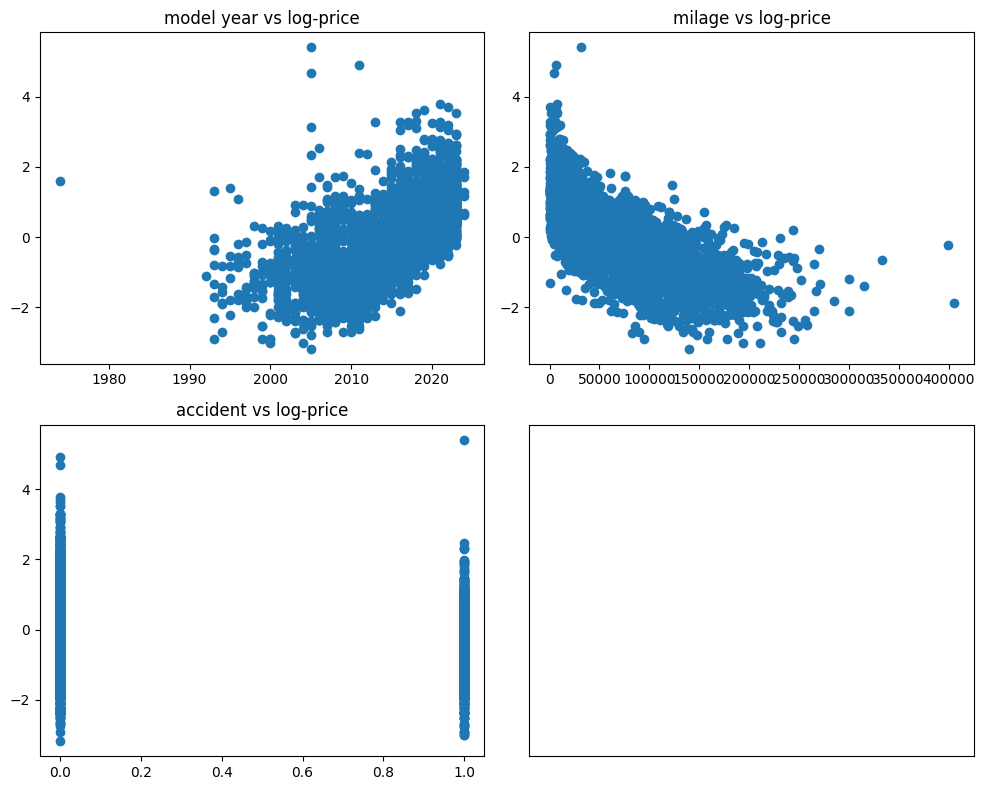

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
log_price = np.log(df["price"])
log_price = (log_price - np.mean(log_price)) / np.std(log_price)

axs[0, 0].scatter(df["model_year"], log_price)
axs[0, 0].set_title("model year vs log-price")

axs[0, 1].scatter(df["milage"], log_price)
axs[0, 1].set_title("milage vs log-price")

axs[1, 0].scatter(df["accident"], log_price)
axs[1, 0].set_title("accident vs log-price")

axs[1, 1].xaxis.set_visible(False)
axs[1, 1].yaxis.set_visible(False)

fig.tight_layout()
fig.show()

## Régression linéaire

Maintenant que l'on a une meilleure visibilité sur nos données, on peut commencer la phase d'entraînement du modèle :

- Transformez et normalisez vos données.
- Rassemblez les features sous une même matrice X et les prix sous un vecteur y.
- Calculez les poids de la régression linéaire en utilisant la formule analytique de la régression linéaire.

---

Une fois que vous avez les poids du modèle :

- Utilisez les poids pour prédire les valeurs de prix des voitures.
- Calculez la loss moyenne du modèle.
- Calculez l'écart moyen entre le prix prédit et le prix actuel.

Comment faire pour ajouter un biais ($w_0$) au modèle ? Implémentez le et comparer les performances des deux modèles.

In [51]:
# Data normalization.
milage = df["milage"].values
milage = (milage - np.min(milage)) / (np.max(milage) - np.min(milage))
model_year = df["model_year"].values
model_year = (model_year - np.min(model_year)) / (np.max(model_year) - np.min(model_year))
accident = df["accident"].values
X = np.stack((milage, model_year, accident), axis=1)
print("X shape:", X.shape)

y = df["price"].values
y = np.log(y)
y = (y - np.mean(y)) / np.std(y)
y = y.reshape(-1, 1)
print("y shape:", y.shape)

X shape: (4009, 3)
y shape: (4009, 1)


In [50]:
# Learning the regression weights.
A = np.linalg.inv(X.T @ X) @ X.T @ y
print("A shape:", A.shape)
print("A:", A.flatten())

A shape: (3, 1)
A: [-4.91742953  1.00405937 -0.12487091]


Mean loss: 0.460


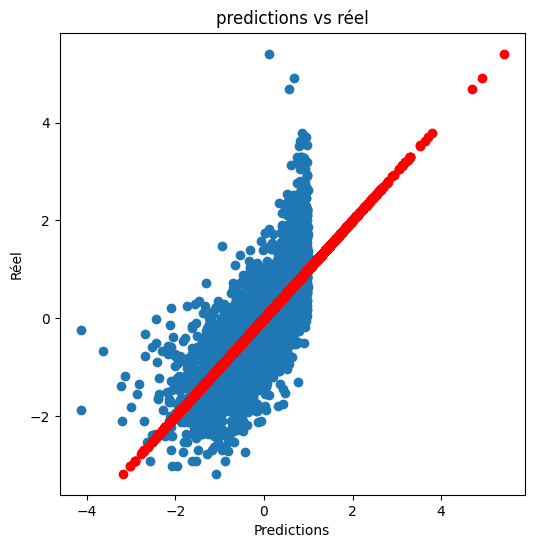

In [48]:
# Predicting the values using the learned model.
y_pred = X @ A
loss = np.mean((y_pred - y) ** 2)
print(f"Mean loss: {loss:.3f}")

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_pred, y)
ax.scatter(y, y, c="red")
ax.set_title("predictions vs réel")
ax.set_xlabel("Predictions")
ax.set_ylabel("Réel")
fig.show()

Xb shape: (4009, 4)
Ab shape: (4, 1)
Mean loss: 0.440


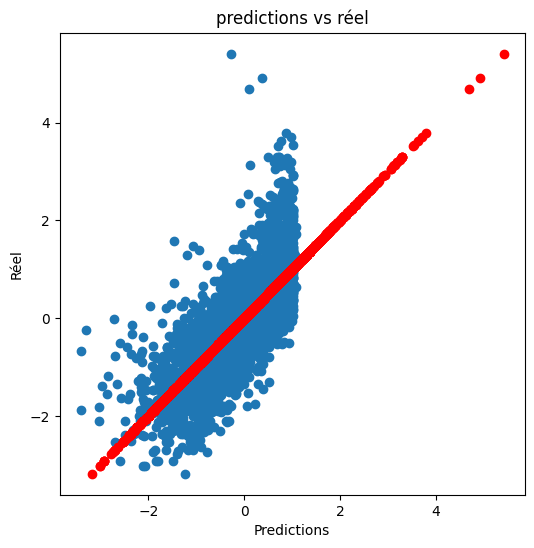

In [47]:
# Add a bias to the model.
b = np.ones((len(X), 1))
Xb = np.concatenate((X, b), axis=1)
print("Xb shape:", Xb.shape)

Ab = np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y
print("Ab shape:", Ab.shape)

y_pred = Xb @ Ab
loss = np.mean((y_pred - y) ** 2)
print(f"Mean loss: {loss:.3f}")

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_pred, y)
ax.scatter(y, y, c="red")
ax.set_title("predictions vs réel")
ax.set_xlabel("Predictions")
ax.set_ylabel("Réel")
fig.show()

Que faire ensuite ? Quelques idées :

- Retirer les données abhérantes.
- Ajouter de features provenant des autres colonnes.
- Transformer les features existantes.